### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')



In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,0.0
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,0.0
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,0.0
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,0.0
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,0.0


<Axes: >

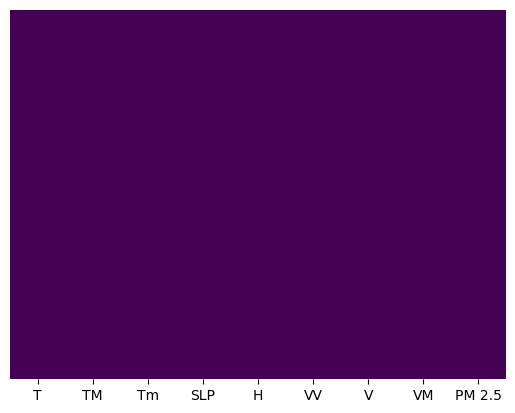

In [5]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df=df.dropna()

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [8]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [9]:
y.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
Name: PM 2.5, dtype: bool

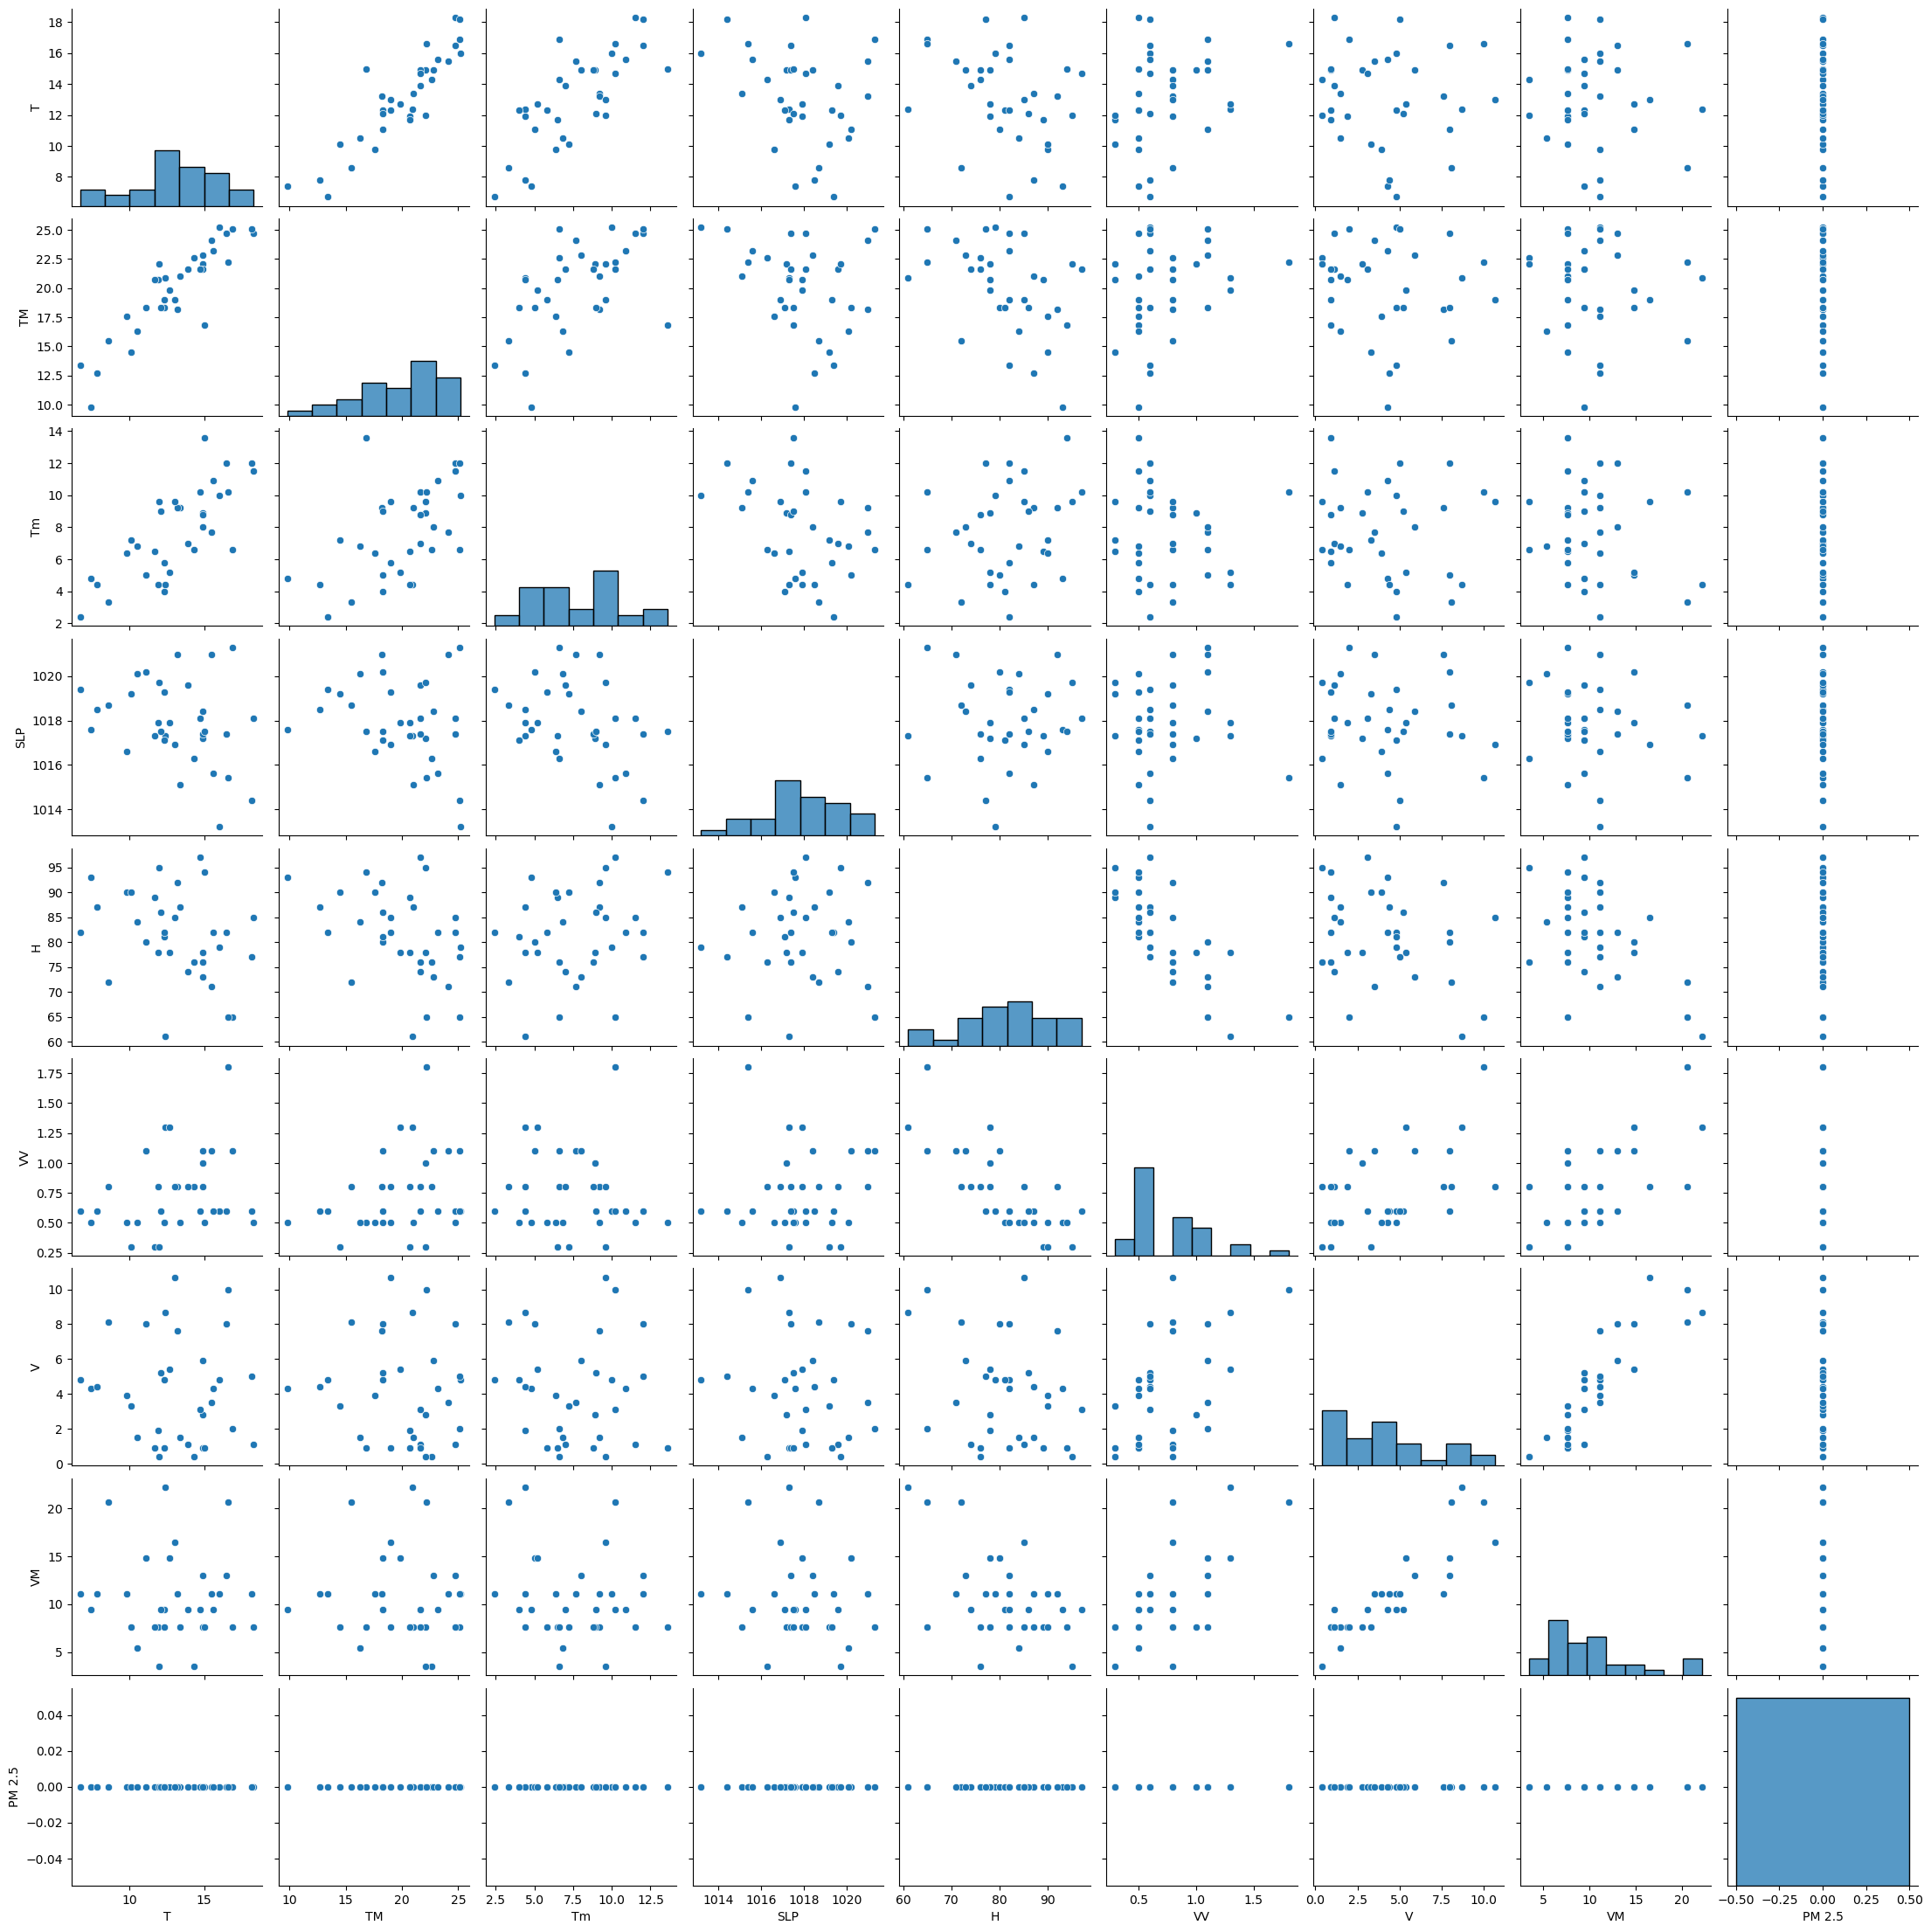

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.894924,0.752402,-0.296568,-0.313897,0.281060,-0.067788,-0.064443,NaN
TM,0.894924,1.000000,0.544028,-0.261849,-0.416638,0.276759,-0.102420,-0.061629,NaN
Tm,0.752402,0.544028,1.000000,-0.361599,0.241888,-0.111009,-0.063983,-0.184248,NaN
SLP,-0.296568,-0.261849,-0.361599,1.000000,0.026717,0.046024,-0.124889,-0.129160,NaN
H,-0.313897,-0.416638,0.241888,0.026717,1.000000,-0.760951,-0.292827,-0.498607,NaN
VV,0.281060,0.276759,-0.111009,0.046024,-0.760951,1.000000,0.513228,0.636876,NaN
V,-0.067788,-0.102420,-0.063983,-0.124889,-0.292827,0.513228,1.000000,0.876794,NaN
VM,-0.064443,-0.061629,-0.184248,-0.129160,-0.498607,0.636876,0.876794,1.000000,NaN
PM 2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

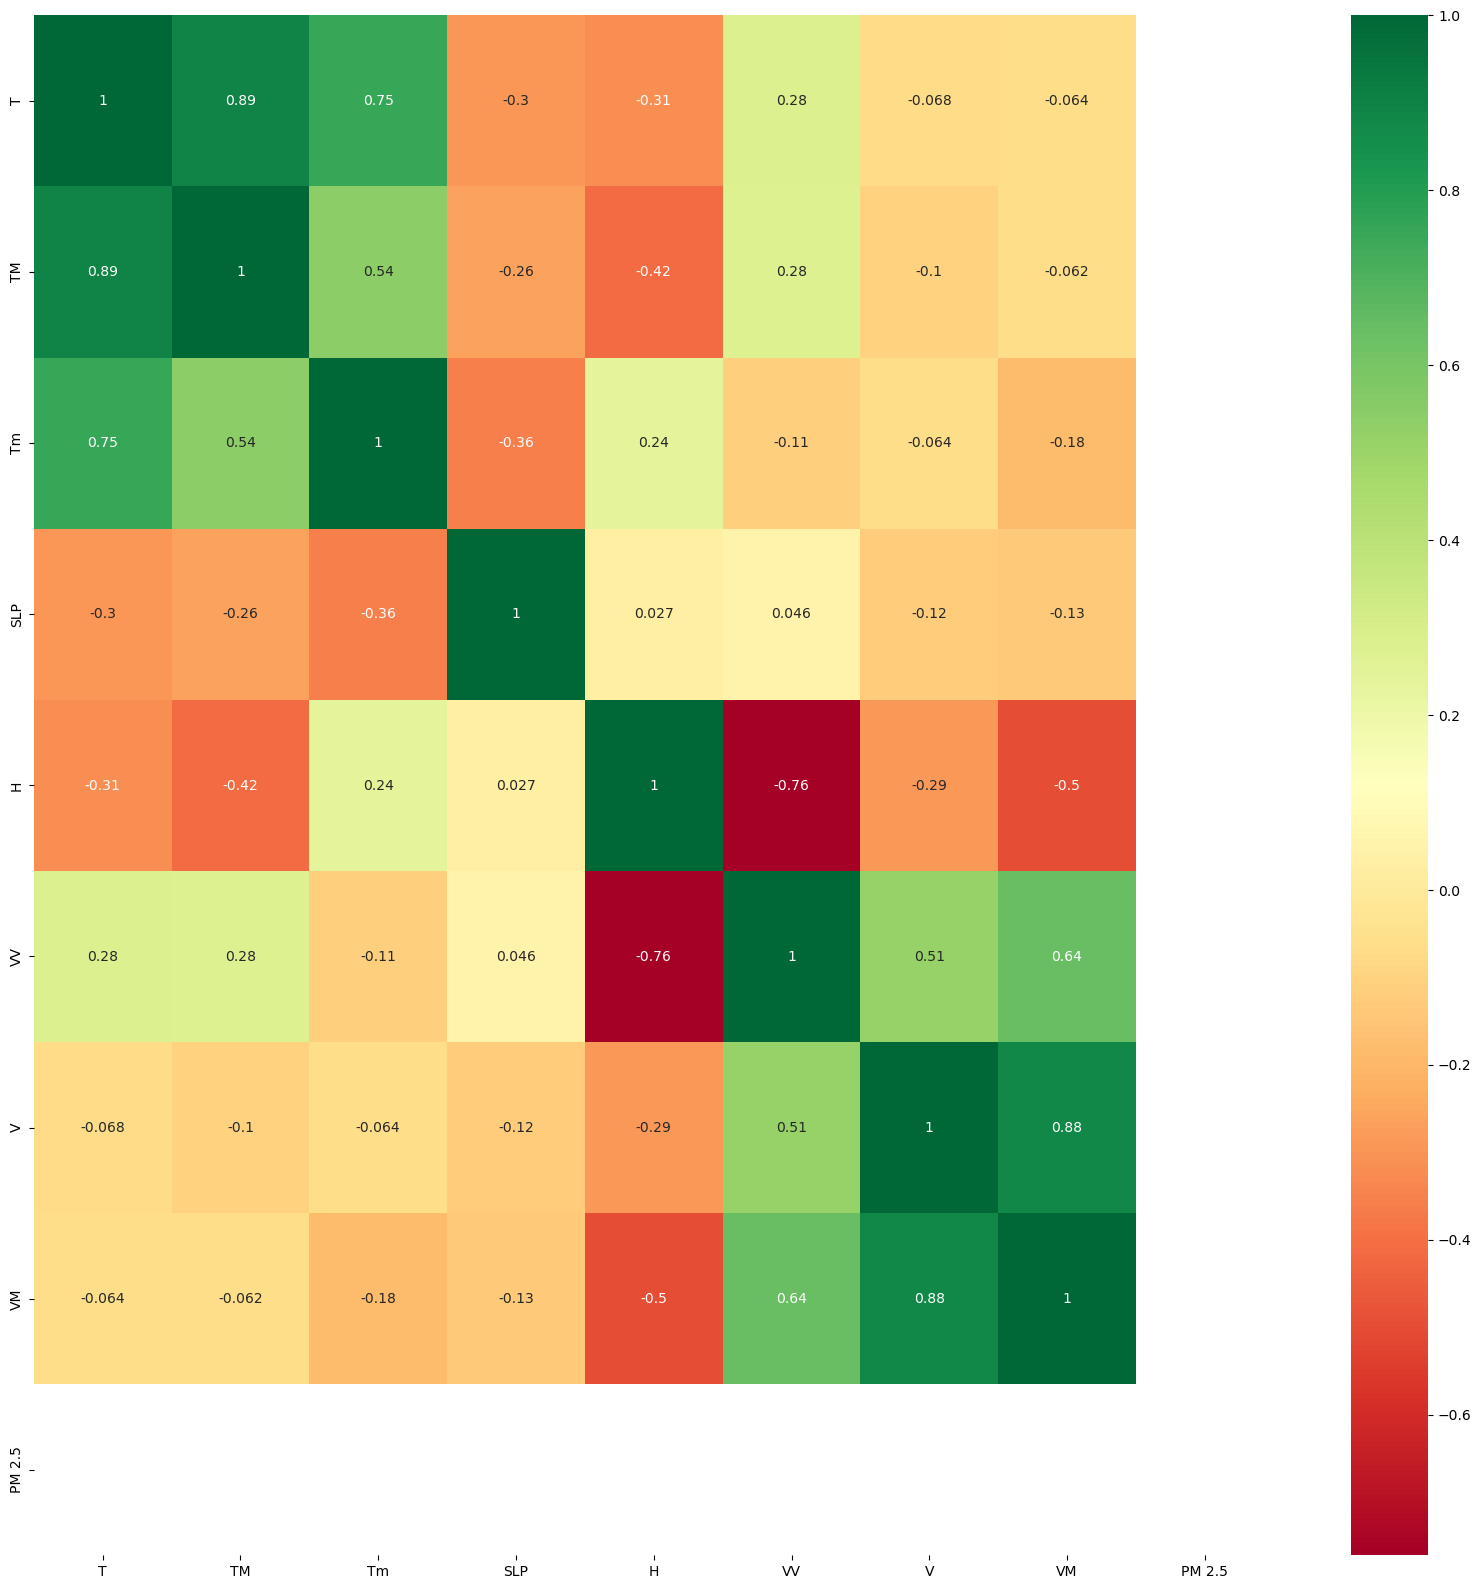

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [18]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0.]


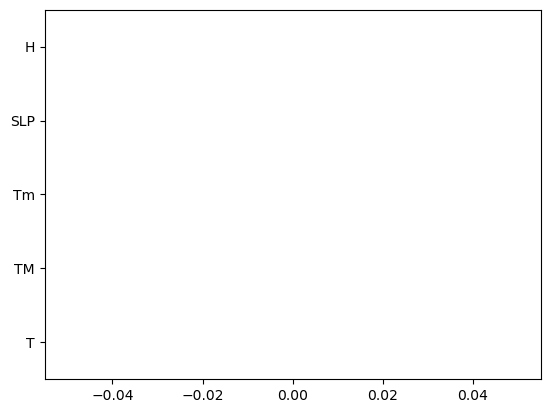

In [19]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

C:\Users\DELL\AppData\Local\Temp\ipykernel_17020\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='PM 2.5', ylabel='Density'>

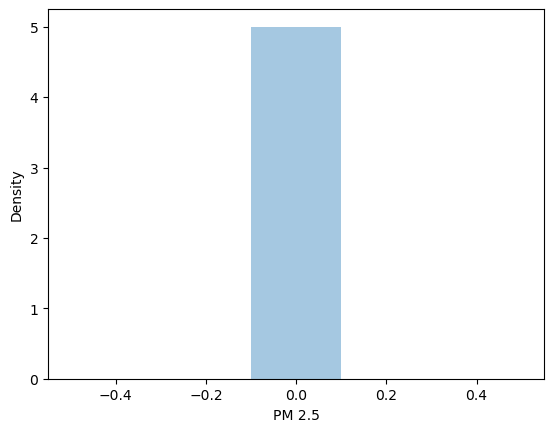

In [21]:
sns.distplot(y)

### Train Test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.coef_

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
regressor.intercept_

0.0

In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [29]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0


In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [31]:
score.mean()

1.0

#### Model Evaluation

In [33]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.0
TM,0.0
Tm,0.0
SLP,0.0
H,0.0
VV,0.0
V,0.0
VM,0.0


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [35]:
prediction=regressor.predict(X_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17020\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='PM 2.5', ylabel='Density'>

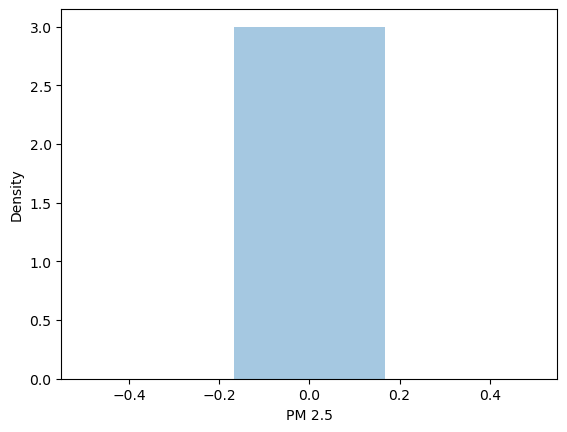

In [36]:
sns.distplot(y_test-prediction)

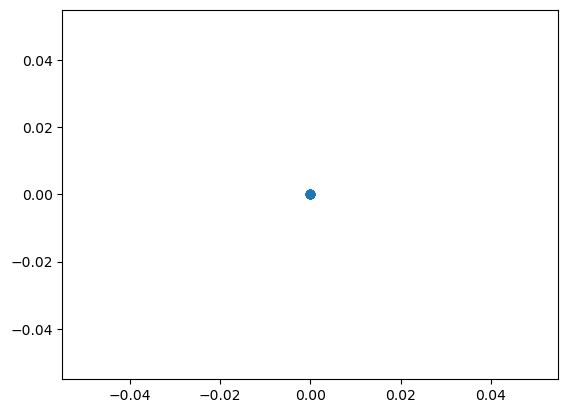

In [37]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [39]:
from sklearn import metrics

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [41]:
import pickle 

In [42]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)